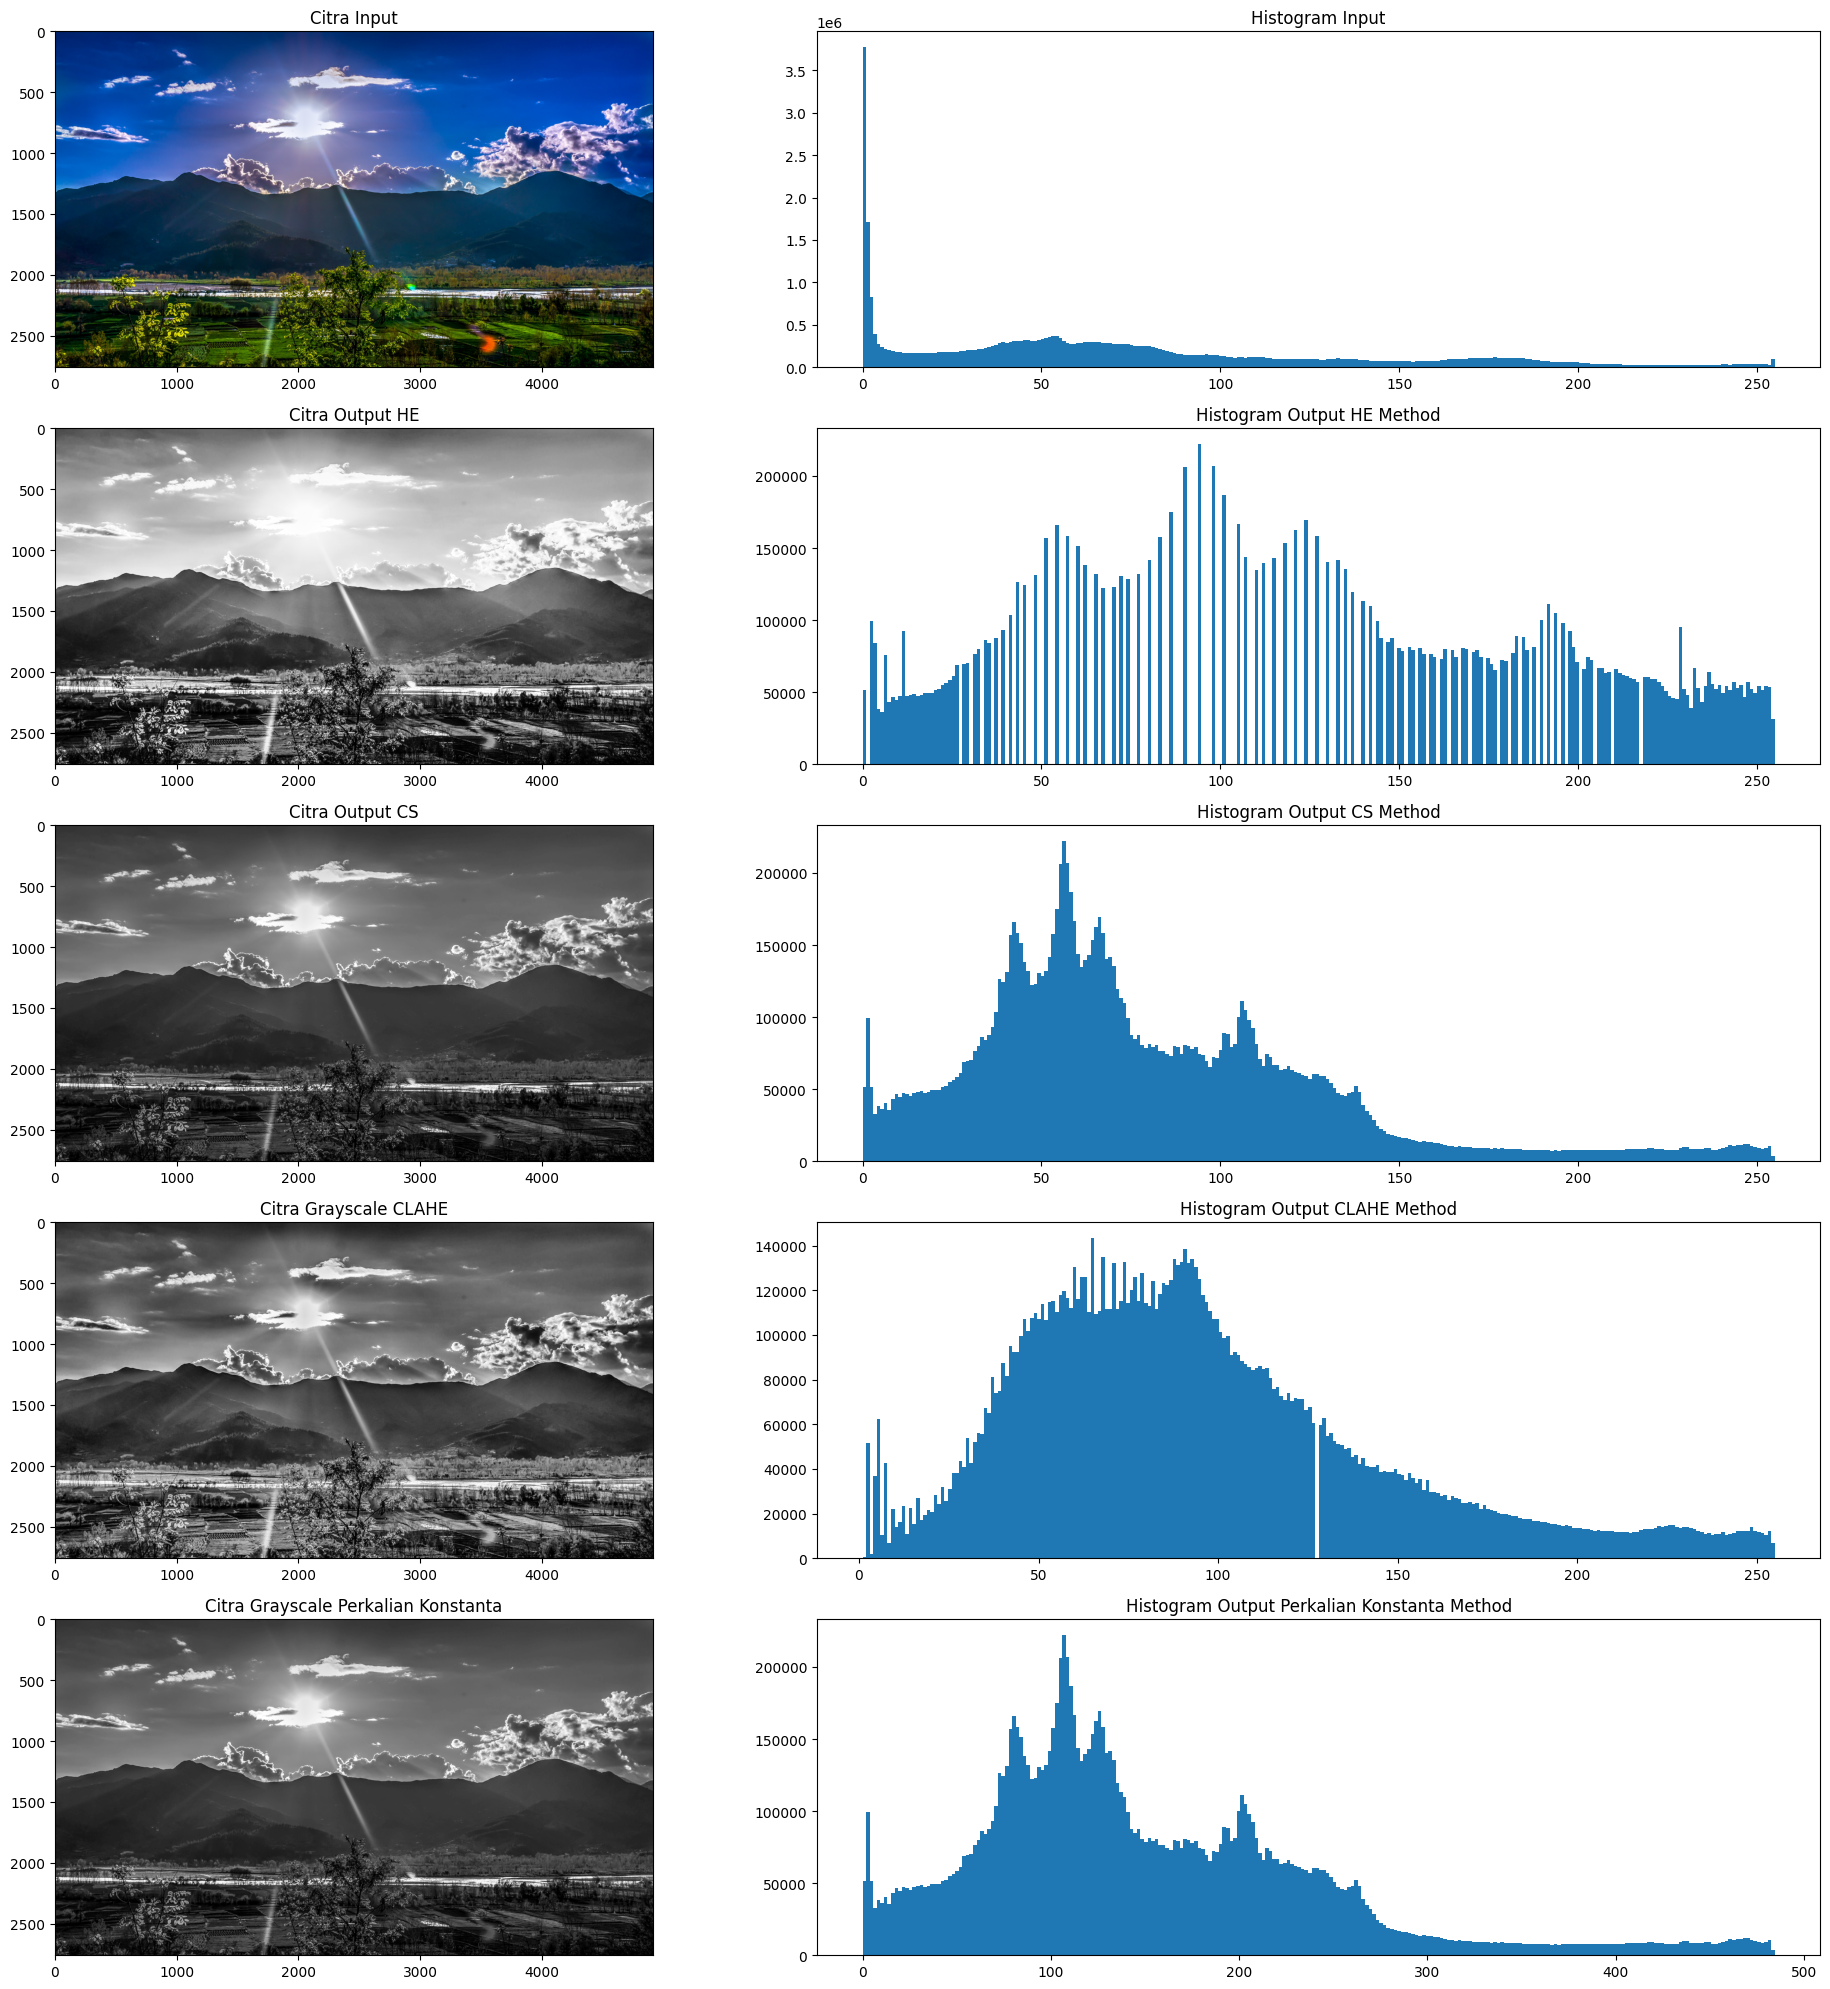

In [8]:
import numpy as np # ini untuk Mengimpor library yang diperlukan untuk pemrosesan suatu gambar dan visualisasi
import matplotlib.pyplot as plt # ini untuk Mengimpor library yang diperlukan untuk pemrosesan suatu gambar dan visualisasi
import cv2 # ini untuk Mengimpor library yang diperlukan untuk pemrosesan suatu gambar dan visualisasi
import matplotlib.image as mpimg # ini untuk Mengimpor library yang diperlukan untuk pemrosesan suatu gambar dan visualisasi
from skimage import data # ini untuk Mengimpor library yang diperlukan untuk pemrosesan suatu gambar dan visualisasi
from skimage import io # ini untuk Mengimpor library yang diperlukan untuk pemrosesan suatu gambar dan visualisasi

image = io.imread('Awan.jpg') # berfungsi untuk Membaca file gambar dengan nama 'Awan.jpg' menggunakan fungsi io.imread() dari library scikit-image.

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # Mengubah gambar yang telah dimuat menjadi citra grayscale menggunakan fungsi cv2.cvtColor() dari library OpenCV.

gray_image_equalized = cv2.equalizeHist(gray_image) # Melakukan equalisasi histogram pada citra grayscale menggunakan fungsi cv2.equalizeHist() dari library OpenCV.

clahe = cv2.createCLAHE(clipLimit=2, tileGridSize=(8, 8)) # Membuat objek Contrast Limited Adaptive Histogram Equalization (CLAHE) menggunakan fungsi cv2.createCLAHE().
clahe_image = clahe.apply(gray_image) # dan menerapkannya pada citra grayscale menggunakan fungsi clahe.apply()

image_cs = np.zeros(gray_image.shape, dtype='uint8') # Membuat array nol dengan ukuran yang sama dengan citra grayscale.

min_val = np.min(gray_image) # Menghitung nilai minimum dan maksimum dalam citra grayscale menggunakan fungsi np.min() dan np.max() dari library NumPy.
max_val = np.max(gray_image)

image_cs = cv2.normalize(gray_image, image_cs, 0, 255, cv2.NORM_MINMAX) #Melakukan normalisasi pada citra grayscale menggunakan fungsi cv2.normalize() dari library OpenCV, dengan rentang nilai 0 hingga 255.

copyCamera = gray_image.copy().astype(float)
output1 = copyCamera * 1.9 # Membuat salinan citra grayscale, mengubah tipe datanya menjadi float, dan melakukan skalabilitas intensitas dengan mengalikannya dengan 1.9, disimpan dalam variabel output1.

fig, axes = plt.subplots(5, 2, figsize=(20, 20))
ax = axes.ravel() # Membuat sebuah figure dengan 5 baris dan 2 kolom subplot, dan mendapatkan objek axes.

# Menampilkan gambar asli pada subplot pertama, mengatur judulnya, dan menggambar histogram gambar pada subplot kedua dengan 256 bins.
ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title("Citra Input")
ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram Input')
 
# Menampilkan gambar asli pada subplot pertama, mengatur judulnya, dan menggambar histogram gambar pada subplot kedua dengan 256 bins.
ax[2].imshow(gray_image_equalized, cmap=plt.cm.gray)
ax[2].set_title("Citra Output HE")
ax[3].hist(gray_image_equalized.ravel(), bins=256)
ax[3].set_title('Histogram Output HE Method')

ax[4].imshow(image_cs, cmap=plt.cm.gray) # Menampilkan citra hasil equalisasi histogram pada subplot ketiga, mengatur judulnya, dan menggambar histogram citra pada subplot keempat dengan 256 bins.
ax[4].set_title("Citra Output CS") # Menampilkan citra hasil equalisasi histogram pada subplot ketiga, mengatur judulnya, dan menggambar histogram citra pada subplot keempat dengan 256 bins.
ax[5].hist(image_cs.ravel(), bins=256)
ax[5].set_title('Histogram Output CS Method')

# kode ke bawah Menampilkan gambar asli pada subplot pertama, mengatur judulnya, dan menggambar histogram gambar pada subplot kedua dengan 256 bins.
ax[6].imshow(clahe_image, cmap=plt.cm.gray)
ax[6].set_title("Citra Grayscale CLAHE")
ax[7].hist(clahe_image.ravel(), bins=256)
ax[7].set_title('Histogram Output CLAHE Method')

# ini juga kebawahnya Menampilkan gambar asli pada subplot pertama, mengatur judulnya, dan menggambar histogram gambar pada subplot kedua dengan 256 bins.
ax[8].imshow(output1, cmap=plt.cm.gray)
ax[8].set_title("Citra Grayscale Perkalian Konstanta")
ax[9].hist(output1.ravel(), bins=256)
ax[9].set_title('Histogram Output Perkalian Konstanta Method')

fig.tight_layout() # untuk menampilkan Gambar biar rapi
plt.show() # Untuk menampilkan suatu gambar